In [6]:
import matplotlib.pyplot as plt
import numpy as np
import vegas
import random as rand

Lambda = 10 ** 3 #Gev
alpha = 1 / 132.184
m_W = 80.379 #Gev
m_Z = 91.1876 #Gev
m_e = 0.511E-3 #Gev
m_m = 105.66E-3 #Gev
m_h = 125.1 #Gev
e = (4 * np.pi * alpha) ** 0.5
cos = m_W / m_Z
sin = np.sqrt(1 - cos ** 2)
v = 2 * m_W * sin / e #Gev
ECM = m_h
hats = ECM ** 2 # all quantities are in GeV
pb_convert = 3.894E8 # conversion factor GeV^-2 -> pb
C_HD = 10 ** (-10)
C_HWB = 10 ** (-10)
v_alt = v / (1 + v ** 2 * (cos / sin) * (C_HWB + (cos / (4 * sin)) * C_HD)) #Gev
C_eB = m_m / (v * 10 ** 4)
C_eW = C_eB
C_eB_conj = C_eB
C_eW_conj = C_eW

def diff_decay(s, t, ml, v, CW, SW, C_eB, C_eW, C_eB_conj, C_eW_conj):
    N = 1 / (32 * (2 * np.pi) ** 3  * m_h ** 3)
    u = m_h ** 2 + 2 * ml ** 2 - s - t
    struc_4 = (4 * e ** 2 * (m_h ** 4 + s ** 2)) / (t * u)
    struc_6 = 4 * 2 ** 0.5 * e * m_h ** 2 * (-(C_eB + C_eB_conj) * CW + (C_eW + C_eW_conj) * SW)
    struc_8 = 8 * t * u * (C_eB * CW - C_eW * SW) * (C_eB_conj * CW - C_eW_conj * SW)
    return [N * (ml / v) ** 2 * struc_4, N * (ml / v) * struc_6, N * struc_8]

def d_t(m, x):
    return (m_h ** 2 - x) * (1 - 4 * (m ** 2 / x)) ** 0.5

def t_max(s, m):
    return 0.5 * (m_h ** 2 - s + 2 * m ** 2 + (m_h ** 2 - s) * (1 - (4 * m ** 2) / s) ** 0.5) 

def t_min(s, m):
    return 0.5 * (m_h ** 2 - s + 2 * m ** 2 - (m_h ** 2 - s) * (1 - (4 * m ** 2) / s) ** 0.5) 

def s_func_max(m, t):
    return (-t**2+m_h**2*t+2*m**2*t+m_h**2*m**2-m**4+(t**4-2*m_h**2*t**3-4*m**2*t**3+m_h**4*t**2
    +6*m**4*t**2+2*m_h**2*m**2*t**2-4*m**6*t+2*m_h**2*m**4*t-2*m_h**4*m**2*t+m**8-2*m_h**2*m**6+m_h**4*m**4)**0.5)/(2*t)

def s_func_min(m, t):
    return (-t**2+m_h**2*t+2*m**2*t+m_h**2*m**2-m**4-(t**4-2*m_h**2*t**3-4*m**2*t**3+m_h**4*t**2
    +6*m**4*t**2+2*m_h**2*m**2*t**2-4*m**6*t+2*m_h**2*m**4*t-2*m_h**4*m**2*t+m**8-2*m_h**2*m**6+m_h**4*m**4)**0.5)/(2*t)

def E_l(m, u):
    return (m_h ** 2 + m ** 2 - u) / (2 * m_h)

def E_lbar(m, t):
    return (m_h ** 2 + m ** 2 - t) / (2 * m_h)

def E_phot(m, s):
    return (m_h ** 2 - s) / (2 * m_h)

def mom_l(E, m):
    mod = (E ** 2 - m ** 2) ** 0.5
    vec = mod * np.array([0, 0, 1])
    return vec

def mom_lbar(E_m, E_p, m, s, phi):
    mod = (E_p ** 2 - m ** 2) ** 0.5
    cos_th  = (m ** 2 + E_m * E_p - 0.5 * s) / ((E_m ** 2 - m ** 2) * (E_p ** 2 - m ** 2)) ** 0.5
    sin_th = (1 - cos_th ** 2) ** 0.5
    vec = mod * np.array([sin_th * np.cos(phi), sin_th * np.sin(phi), cos_th])
    return vec

def mom_phot(p_mvec, p_pvec):
    return - p_mvec - p_pvec

def cos_ll(m, E_u, E_t, s):
    n = m ** 2 + E_u * E_t - 0.5 * s
    d = (E_u ** 2 - m ** 2) ** 0.5 * (E_t ** 2 - m ** 2) ** 0.5
    return n / d

def cos_lk(m, E_u, E_s, t):
    n = m ** 2 - t + 2 * E_u * E_s
    d = 2 * E_s * (E_u ** 2 - m ** 2) ** 0.5 
    return n / d

In [5]:
m = m_m
s_min_fix = 4 * m ** 2 
s_max_fix = m_h ** 2 
t_min_fix = m ** 2
t_max_fix = (m_h - m) ** 2
s = (s_max_fix - s_min_fix) * 1 + s_min_fix
t = (t_max_fix - t_min_fix) * 1 + t_min_fix
u = m_h ** 2 + 2 * m ** 2 - s - t

print(diff_decay(s, t, m, v_alt, cos, sin, C_eB, C_eW, C_eB_conj, C_eW_conj))

[-9.04312870016226e-18, -2.6474035219230238e-17, -3.87517729774468e-17]


In [12]:
def diff_decay_2(s, t, ml, v, CW, SW, C_eB, C_eW, Lambda):
    N = (e ** 2 * ml ** 2) / (8 * (2 * np.pi) ** 3  * m_h ** 3 * v ** 2)
    u = m_h ** 2 + 2 * ml ** 2 - s - t
    struc_4 = (m_h ** 4 + s ** 2) / (t * u)
    struc_6 = ((2 * 2 ** 0.5 * m_h ** 2 * v) / (ml * e)) * (-C_eB * CW + C_eW * SW)
    struc_8 = ((2 * t * u * v ** 2) / (ml ** 2 * e ** 2)) * (-C_eB * CW + C_eW * SW) ** 2
    return [(Lambda / Lambda) * 1, (1 / Lambda ** 2) * struc_6 / struc_4, (1 / Lambda ** 4) * struc_8 / struc_4]

m = m_m
E_phot_min = 0
s_min_fix = 4 * m ** 2 #(0.1 * m_h) ** 2
s_max_fix = m_h ** 2 - 2 * m_h * E_phot_min
t_min_fix = m ** 2
t_max_fix = (m_h - m) ** 2
s = (s_max_fix - s_min_fix) * 0.5 + s_min_fix
t = (t_max_fix - t_min_fix) * 0.9 + t_min_fix
N = (e ** 2 * m ** 2) / (8 * (2 * np.pi) ** 3  * m_h ** 3 * v_alt ** 2)
u = m_h ** 2 + 2 * m ** 2 - s - t
struc_4 = (m_h ** 4 + s ** 2) / (t * u)

print(diff_decay(s, t, m, v_alt, cos, sin, C_eB, C_eW, C_eB_conj, C_eW_conj, Lambda))
print(np.array(diff_decay_2(s, t, m, v_alt, cos, sin, C_eB, C_eW, Lambda))*struc_4*N, struc_4*N)

[-1.1128617895900384e-16, -1.6407597602875448e-13, -7.559608055219345e-11]
[-1.11286179e-16 -1.64075976e-13 -7.55960806e-11] -1.1128617895900384e-16


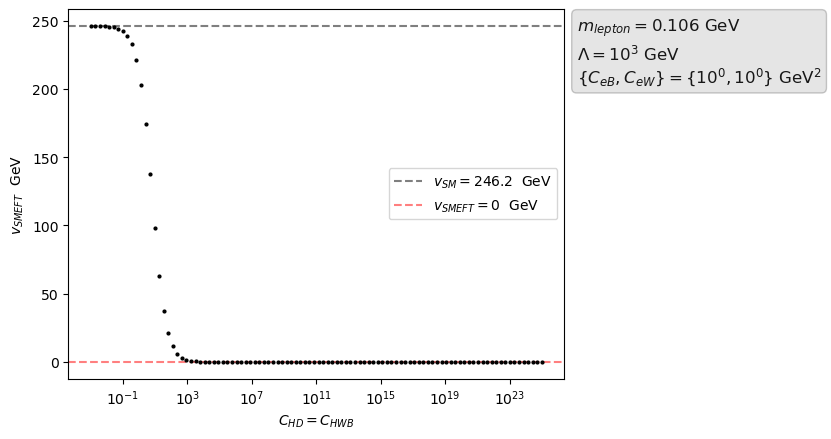

In [23]:
p_eB = 0
p_eW = 0
C_eB = 10 ** (p_eB)
C_eW = 10 ** (p_eW)
C_HDs = np.logspace(-3,25,100)
C_HWBs = C_HDs
p = 3
ml = m_m
Lambda = 10 ** p
v_alts = v / (1 + (v ** 2 / Lambda ** 2) * (cos / sin) * (C_HWBs + (cos / (4 * sin)) * C_HDs))

fig, ax = plt.subplots()

textstr = '\n'.join((
    r'$m_{lepton}=$' +str(round(ml, 3))+ ' GeV',
    r'$\Lambda=10^{' +str(p)+ '}$ GeV',
    r'{$C_{eB}, C_{eW}$}$=${$10^{' +str(p_eB)+ '}, 10^{'+str(round(p_eW))+'}$} GeV$^{2}$'))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

ax.errorbar(C_HDs, v_alts, markersize = 4, marker = '.', ls = 'None', color = 'black')
plt.xscale('log')
plt.xlabel('$C_{HD}=C_{HWB}$')
plt.ylabel('$v_{SMEFT}$  GeV')
plt.axhline(y=v, linestyle = '--', color = 'black', alpha = 0.5, label = '$v_{SM}='+str(round(v,1))+'$  GeV')
plt.axhline(y=0, linestyle = '--', color = 'red', alpha = 0.5, label = '$v_{SMEFT}='+str(0)+'$  GeV')
plt.legend()
plt.show()

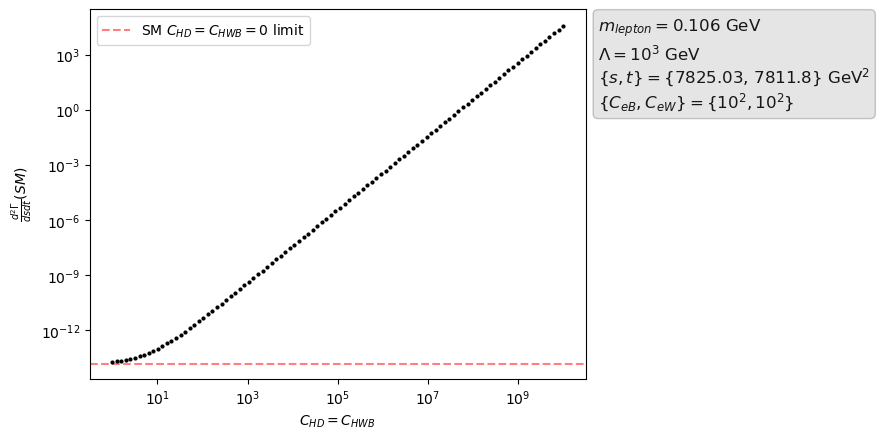

In [8]:
p_eB = 2
p_eW = 2
C_eB = 10 ** (p_eB)
C_eW = 10 ** (p_eW)
C_eB_conj = C_eB
C_eW_conj = C_eW
n = 0.5
m = 0.5
C_HDs = np.logspace(0,10,100)
C_HWBs = C_HDs
p = 3
Lambda = 10 ** p
ml = m_m
s_min_fix = 4 * ml ** 2 
s_max_fix = m_h ** 2 
t_min_fix = ml ** 2
t_max_fix = (m_h - ml) ** 2
s_pick = (s_max_fix - s_min_fix) * n + s_min_fix
t_pick = (t_max_fix - t_min_fix) * m + t_min_fix
v_alts = v / (1 + (v ** 2 / Lambda ** 2) * (cos / sin) * (C_HWBs + (cos / (4 * sin)) * C_HDs))

fig, ax = plt.subplots()

textstr = '\n'.join((
    r'$m_{lepton}=$' +str(round(ml, 3))+ ' GeV',
    r'$\Lambda=10^{' +str(p)+ '}$ GeV',
    r'{$s, t$}$=${' +str(round(s_pick, 2))+ ', '+str(round(t_pick, 2))+'} GeV$^{2}$',
    r'{$C_{eB}, C_{eW}$}$=${$10^{' +str(p_eB)+ '}, 10^{'+str(round(p_eW))+'}$}'))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

plt.xscale('log')
plt.yscale('log')
ax.errorbar(C_HDs, diff_decay(s_pick, t_pick, ml, v_alts, cos, sin, C_eB, C_eW, C_eB_conj, C_eW_conj, Lambda)[0],
             markersize = 4,  marker = '.', ls = 'None', color = 'black')
plt.xlabel('$C_{HD}=C_{HWB}$')
plt.ylabel(r'$\frac{d^{2}\Gamma}{dsdt}(SM)$')
plt.axhline(y=diff_decay(s_pick, t_pick, ml, v, cos, sin, C_eB, C_eW, C_eB_conj, C_eW_conj, Lambda)[0], 
            linestyle = '--', color = 'red', alpha = 0.5, label = 'SM $C_{HD}=C_{HWB}=0$ limit')
plt.legend()
plt.show()

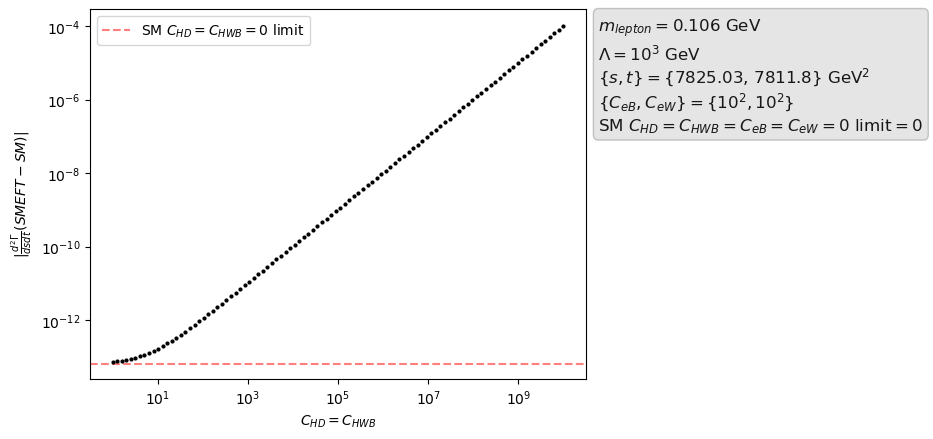

In [9]:
p_eB = 2
p_eW = 2
C_eB = 10 ** (p_eB)
C_eW = 10 ** (p_eW)
C_eB_conj = C_eB
C_eW_conj = C_eW
n = 0.5
m = 0.5
C_HDs = np.logspace(0,10,100)
C_HWBs = C_HDs
p = 3
Lambda = 10 ** p
ml = m_m
s_min_fix = 4 * ml ** 2 
s_max_fix = m_h ** 2 
t_min_fix = ml ** 2
t_max_fix = (m_h - ml) ** 2
s_pick = (s_max_fix - s_min_fix) * n + s_min_fix
t_pick = (t_max_fix - t_min_fix) * m + t_min_fix
v_alts = v / (1 + (v ** 2 / Lambda ** 2) * (cos / sin) * (C_HWBs + (cos / (4 * sin)) * C_HDs))

fig, ax = plt.subplots()

textstr = '\n'.join((
    r'$m_{lepton}=$' +str(round(ml, 3))+ ' GeV',
    r'$\Lambda=10^{' +str(p)+ '}$ GeV',
    r'{$s, t$}$=${' +str(round(s_pick, 2))+ ', '+str(round(t_pick, 2))+'} GeV$^{2}$',
    r'{$C_{eB}, C_{eW}$}$=${$10^{' +str(p_eB)+ '}, 10^{'+str(round(p_eW))+'}$}',
    r'SM $C_{HD}=C_{HWB}=C_{eB}=C_{eW}=0$ limit$='+str(0)+'$'))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

plt.xscale('log')
plt.yscale('log')
ax.errorbar(C_HDs, -diff_decay(s_pick, t_pick, ml, v_alts, cos, sin, C_eB, C_eW, C_eB_conj, C_eW_conj, Lambda)[1],
             markersize = 4,  marker = '.', ls = 'None', color = 'black')
plt.xlabel('$C_{HD}=C_{HWB}$')
plt.ylabel(r'$|\frac{d^{2}\Gamma}{dsdt}(SMEFT-SM)|$')
plt.axhline(y=-diff_decay(s_pick, t_pick, ml, v, cos, sin, C_eB, C_eW, C_eB_conj, C_eW_conj, Lambda)[1], 
            linestyle = '--', color = 'red', alpha = 0.5, label = 'SM $C_{HD}=C_{HWB}=0$ limit')
#plt.axhline(y=-diff_decay(s_pick, t_pick, ml, v, cos, sin, 0, 0, 0, 0, Lambda)[1], 
#            linestyle = '--', color = 'red', alpha = 0.5, label = 'SM $C_{HD}=C_{HWB}=C_{eB}=C_{eW}=0$ limit')
plt.legend()
plt.show()

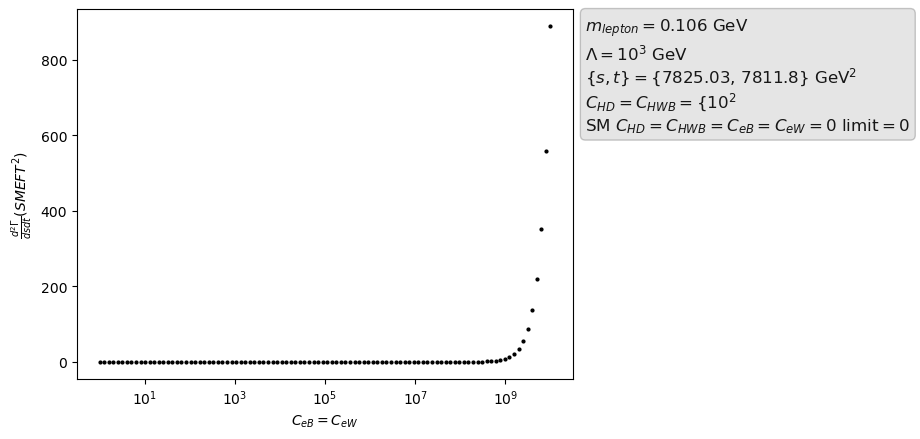

In [10]:
C_eBs = np.logspace(0,10,100)
C_eWs = C_eBs
C_eB_conjs = C_eBs
C_eW_conjs = C_eWs
n = 0.5
m = 0.5
p_HD = 2
C_HD = 10 ** p_HD
C_HWB  = C_HD
p = 3
Lambda = 10 ** p
ml = m_m
s_min_fix = 4 * ml ** 2 
s_max_fix = m_h ** 2 
t_min_fix = ml ** 2
t_max_fix = (m_h - ml) ** 2
s_pick = (s_max_fix - s_min_fix) * n + s_min_fix
t_pick = (t_max_fix - t_min_fix) * m + t_min_fix
v_alt = v / (1 + (v ** 2 / Lambda ** 2) * (cos / sin) * (C_HWB + (cos / (4 * sin)) * C_HD))

fig, ax = plt.subplots()

textstr = '\n'.join((
    r'$m_{lepton}=$' +str(round(ml, 3))+ ' GeV',
    r'$\Lambda=10^{' +str(p)+ '}$ GeV',
    r'{$s, t$}$=${' +str(round(s_pick, 2))+ ', '+str(round(t_pick, 2))+'} GeV$^{2}$',
    r'$C_{HD}=C_{HWB}=${$10^{' +str(p_HD)+ '}$',
    r'SM $C_{HD}=C_{HWB}=C_{eB}=C_{eW}=0$ limit$='+str(0)+'$'))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

plt.xscale('log')
#plt.yscale('log')
ax.errorbar(C_eBs, diff_decay(s_pick, t_pick, ml, v_alt, cos, sin, C_eBs, C_eWs, C_eB_conjs, C_eW_conjs, Lambda)[2],
             markersize = 4,  marker = '.', ls = 'None', color = 'black')
plt.xlabel('$C_{eB}=C_{eW}$')
plt.ylabel(r'$\frac{d^{2}\Gamma}{dsdt}(SMEFT^{2})$')
#plt.axhline(y=diff_decay(s_pick, t_pick, ml, v, cos, sin, C_eB, C_eW, C_eB_conj, C_eW_conj, Lambda)[2], 
#            linestyle = '--', color = 'red', alpha = 0.5, label = 'SM $C_{HD}=C_{HWB}=0$ limit')
#plt.axhline(y=-diff_decay(s_pick, t_pick, ml, v, cos, sin, 0, 0, 0, 0, Lambda)[1], 
#            linestyle = '--', color = 'red', alpha = 0.5, label = 'SM $C_{HD}=C_{HWB}=C_{eB}=C_{eW}=0$ limit')
#plt.legend()
plt.show()

In [8]:
#delta = 0.1
#s_min_fix = 4 * m_m ** 2 + delta
#s_max_fix = m_h ** 2 - delta
#t_min_fix = m_m ** 2
#t_max_fix = (m_h - m_m) ** 2
m = m_m
E_phot_min = 0
s_min_fix = 4 * m ** 2 #(0.1 * m_h) ** 2
s_max_fix = m_h ** 2 - 2 * m_h * E_phot_min
t_min_fix = m ** 2
t_max_fix = (m_h - m) ** 2
nitns = 20
nevals = 2 * 10 ** 4
bins = 100

def total_s(x):
    s_subs = s_min_fix + (s_max_fix - s_min_fix) * x[1] #primed
    t_subs = t_min(s_subs, m_m) + (t_max(s_subs, m_m) - t_min(s_subs, m_m)) * x[0] #unprimed
    u = m_h ** 2 + 2 * m_m ** 2 - s_subs - t_subs
    
    dI = np.zeros(bins, dtype=float) 
    dI_4 = np.zeros(bins, dtype=float) 
    dI_6 = np.zeros(bins, dtype=float) 
    dI_8 = np.zeros(bins, dtype=float) 
    dr = (s_max_fix - s_min_fix) / len(dI)
    dI_t = np.zeros(bins, dtype=float) 
    dI_4_t = np.zeros(bins, dtype=float) 
    dI_6_t = np.zeros(bins, dtype=float) 
    dI_8_t = np.zeros(bins, dtype=float) 
    dr_t = (t_max_fix - t_min_fix) / len(dI)
    dI_cos = np.zeros(bins, dtype=float) 
    dr_cos = 2 / len(dI_cos) 
    dI_cos_alt = np.zeros(bins, dtype=float)
    dr_cos_alt = 2 / len(dI_cos_alt)
    
    #if t_subs < t_max_fix and t_subs > t_min_fix:
    I = (s_max_fix - s_min_fix) * (t_max(s_subs, m_m) - t_min(s_subs, m_m)) * np.sum(diff_decay(s_subs, t_subs, m, v_alt, cos, sin, C_eB, C_eW, C_eB_conj, C_eW_conj))
    I_4 = (s_max_fix - s_min_fix) * (t_max(s_subs, m_m) - t_min(s_subs, m_m)) * diff_decay(s_subs, t_subs, m, v_alt, cos, sin, C_eB, C_eW, C_eB_conj, C_eW_conj)[0] 
    I_6 = (s_max_fix - s_min_fix) * (t_max(s_subs, m_m) - t_min(s_subs, m_m)) * diff_decay(s_subs, t_subs, m, v_alt, cos, sin, C_eB, C_eW, C_eB_conj, C_eW_conj)[1]  
    I_8 = (s_max_fix - s_min_fix) * (t_max(s_subs, m_m) - t_min(s_subs, m_m)) * diff_decay(s_subs, t_subs, m, v_alt, cos, sin, C_eB, C_eW, C_eB_conj, C_eW_conj)[2]  
    
    j = int((s_subs - s_min_fix) / dr)
    dI[j] = I
    j_t = int((t_subs - t_min_fix) / dr_t)
    dI_t[j_t] = I
    
    dI_4[j] = I_4
    dI_4_t[j_t] = I_4
    
    dI_6[j] = I_6
    dI_6_t[j_t] = I_6
    
    dI_8[j] = I_8
    dI_8_t[j_t] = I_8
    
    
    #j_cos = int((cos_lk(m_m, E_l(m_m, u), E_phot(m_m, s_subs), t_subs) + 1) / dr_cos) 
    #dI_cos[j_cos] = I
    #j_cos_alt = int((cos_ll(m_m, E_l(m_m, u), E_lbar(m_m, t_subs), s_subs) + 1) / dr_cos_alt)
    #dI_cos_alt[j_cos_alt] = I
        
    #else:
    #    I = 0
    #    print(I)
   
    return dict(I=I, dI=dI, dI_t=dI_t, I_4=I_4, dI_4=dI_4, dI_4_t=dI_4_t, I_6=I_6, dI_6=dI_6, dI_6_t=dI_6_t, I_8=I_8, dI_8=dI_8, dI_8_t=dI_8_t)#dI_cos=dI_cos, dI_cos_alt=dI_cos_alt)

total_decay_integ = vegas.Integrator([[0, 1], [0, 1]])
total_rate = total_decay_integ(total_s, nitn = nitns, neval = nevals)
print(total_rate.summary())
print('Sum(dI/I) =', sum(total_rate['dI']) / total_rate['I']) #should be 1

computed = total_rate['I'].mean
error = total_rate['I'].sdev
print('Vegas Cross-Section = '+str(computed)+' +/ '+str(error)+'')

computed_4 = total_rate['I_4'].mean
error_4 = total_rate['I_4'].sdev
print('Vegas Cross-Section = '+str(computed_4)+' +/ '+str(error_4)+'')

computed_6 = total_rate['I_6'].mean
error_6 = total_rate['I_6'].sdev
print('Vegas Cross-Section = '+str(computed_6)+' +/ '+str(error_6)+'')

computed_8 = total_rate['I_8'].mean
error_8 = total_rate['I_8'].sdev
print('Vegas Cross-Section = '+str(computed_8)+' +/ '+str(error_8)+'')

<ipython-input-8-6b8a45ee685a>:70: UserWarning: gammaQ convergence not complete -- want: nan << 1e-05
  print(total_rate.summary())


itn   integral        wgt average     chi2/dof        Q
-------------------------------------------------------
  1   3.51(37)e-07    3.51(37)e-07        0.00     1.00
  2   4.15(20)e-07    3.55(16)e-07         nan      nan
  3   3.837(81)e-07   3.454(50)e-07       0.91     1.00
  4   3.889(97)e-07   3.511(74)e-07       1.36     0.00
  5   3.848(49)e-07   3.502(41)e-07       1.30     0.00
  6   4.004(50)e-07   3.562(27)e-07       1.52     0.00
  7   3.887(30)e-07   3.573(18)e-07       1.81     0.00
  8   3.884(25)e-07   3.605(14)e-07       2.25     0.00
  9   3.869(19)e-07   3.672(12)e-07       2.90     0.00
 10   3.913(17)e-07   3.754(10)e-07       4.14     0.00
 11   3.879(14)e-07   3.9387(91)e-07      7.38     0.00
 12   3.877(13)e-07   3.8127(72)e-07      9.03     0.00
 13   3.887(11)e-07   3.8347(64)e-07     14.67     0.00
 14   3.8926(99)e-07  3.8603(55)e-07     18.43     0.00
 15   3.8818(91)e-07  3.7545(44)e-07     24.31     0.00
 16   3.8787(80)e-07  3.7252(38)e-07     38.24  

In [3]:
dIs = []
dI_errs = []

cos_s = []
for i in range(0, bins):
    cos_s += [-1 + (i + 0.5) * 2 / bins]
    
for i in range(0, bins):
    dIs += [total_rate['dI_cos'][i].mean]
    dI_errs += [total_rate['dI_cos'][i].sdev]
    
norm = 2 / bins
keV = 10 ** 6

fig, ax = plt.subplots()

ax.errorbar(cos_s, keV * np.array(dIs) / norm, color = 'black', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'Vegas', yerr = keV * np.array(dI_errs) / norm)

textstr = '\n'.join((
    r'$\Gamma_{Vegas}=$' +str(round(computed, 11))+ ' GeV',
    r'$N_{evals}=$' +str(nevals)+ '',
    r'$N_{itns}=$' +str(nitns)+ ''))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

plt.yscale('log')
plt.ylabel(r'$\frac{d\Gamma[keV]}{d\cos(\theta_{\mu\gamma})}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xlabel(r'$cos(\theta_{\mu\gamma})$')
plt.show()

KeyError: 'undefined key: dI_cos'

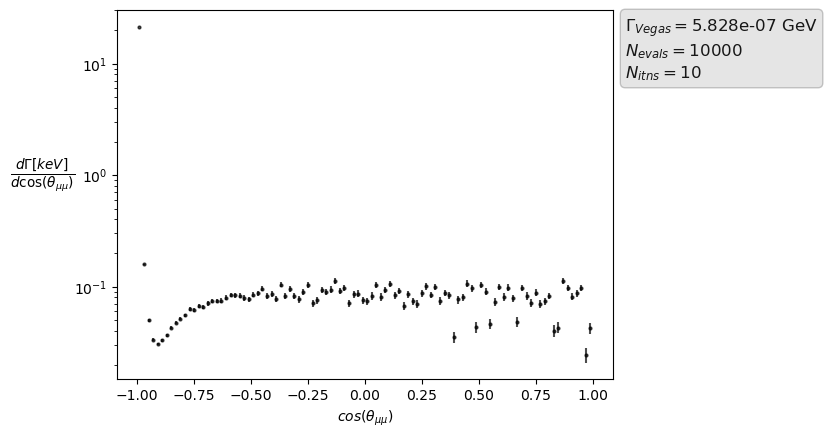

In [33]:
dIs = []
dI_errs = []

cos_s = []
for i in range(0, bins):
    cos_s += [-1 + (i + 0.5) * 2 / bins]
    
for i in range(0, bins):
    dIs += [total_rate['dI_cos_alt'][i].mean]
    dI_errs += [total_rate['dI_cos_alt'][i].sdev]

norm = 2 / bins
keV = 10 ** 6

fig, ax = plt.subplots()

ax.errorbar(cos_s, keV * np.array(dIs) / norm, color = 'black', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'Vegas', yerr = keV * np.array(dI_errs) / norm)

textstr = '\n'.join((
    r'$\Gamma_{Vegas}=$' +str(round(computed, 11))+ ' GeV',
    r'$N_{evals}=$' +str(nevals)+ '',
    r'$N_{itns}=$' +str(nitns)+ ''))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

plt.yscale('log')
plt.ylabel(r'$\frac{d\Gamma[keV]}{d\cos(\theta_{\mu\mu})}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xlabel(r'$cos(\theta_{\mu\mu})$')
plt.show()

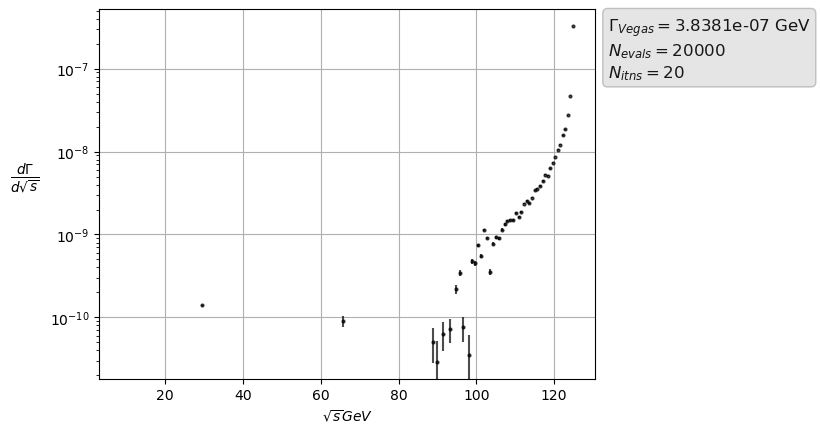

In [9]:
dIs = []
dI_errs = []
sqs = []
ss = []
for i in range(0, bins):
    ss += [s_min_fix + 0.5 * (s_max_fix - s_min_fix) / bins + i * (s_max_fix - s_min_fix) / bins]
    
sbins = []
for i in range(0, bins + 1):
    sbins += [i * (s_max_fix - s_min_fix) / bins]
    
sdbins = []
for i in range(0, bins):
    sdbins += [sbins[i + 1] ** 0.5 - sbins[i] ** 0.5]
    
for i in range(0, bins):
    dIs += [total_rate['dI'][i].mean / sdbins[i]]
    dI_errs += [total_rate['dI'][i].sdev / sdbins[i]]

sqs = np.array(ss) ** 0.5

fig, ax = plt.subplots()

ax.errorbar(sqs, np.array(dIs), color = 'black', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'Vegas', yerr = np.array(dI_errs))

plt.grid()
textstr = '\n'.join((
    r'$\Gamma_{Vegas}=$' +str(round(computed, 11))+ ' GeV',
    r'$N_{evals}=$' +str(nevals)+ '',
    r'$N_{itns}=$' +str(nitns)+ ''))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

plt.yscale('log')

plt.ylabel(r'$\frac{d\Gamma}{d\sqrt{s}}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xlabel(r'$\sqrt{s} GeV$')
#plt.ylim(10**-10, 10**-6)
#plt.xlim(0, 130)
plt.show()

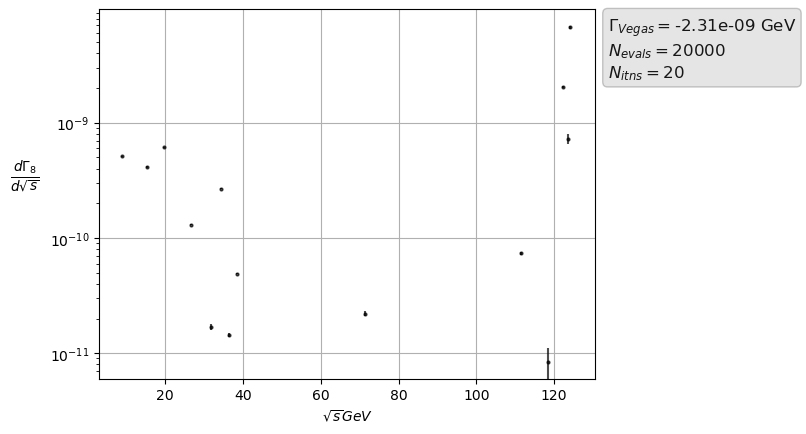

In [10]:
dI_8s = []
dI_8errs = []
sqs = []
ss = []
for i in range(0, bins):
    ss += [s_min_fix + 0.5 * (s_max_fix - s_min_fix) / bins + i * (s_max_fix - s_min_fix) / bins]
    
sbins = []
for i in range(0, bins + 1):
    sbins += [i * (s_max_fix - s_min_fix) / bins]
    
sdbins = []
for i in range(0, bins):
    sdbins += [sbins[i + 1] ** 0.5 - sbins[i] ** 0.5]
    
for i in range(0, bins):
    dI_8s += [total_rate['dI_8'][i].mean / sdbins[i]]
    dI_8errs += [total_rate['dI_8'][i].sdev / sdbins[i]]

sqs = np.array(ss) ** 0.5

fig, ax = plt.subplots()

ax.errorbar(sqs, np.array(dI_8s), color = 'black', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'Vegas', yerr = np.array(dI_8errs))

plt.grid()
textstr = '\n'.join((
    r'$\Gamma_{Vegas}=$' +str(round(computed_8, 11))+ ' GeV',
    r'$N_{evals}=$' +str(nevals)+ '',
    r'$N_{itns}=$' +str(nitns)+ ''))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

plt.yscale('log')

plt.ylabel(r'$\frac{d\Gamma_{8}}{d\sqrt{s}}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xlabel(r'$\sqrt{s} GeV$')
#plt.ylim(10**-10, 10**-6)
#plt.xlim(0, 130)
plt.show()

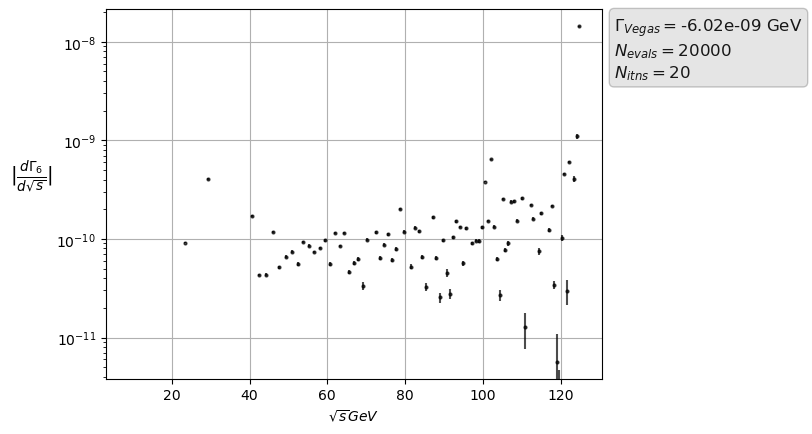

In [11]:
dI_6s = []
dI_6errs = []
sqs = []
ss = []
for i in range(0, bins):
    ss += [s_min_fix + 0.5 * (s_max_fix - s_min_fix) / bins + i * (s_max_fix - s_min_fix) / bins]
    
sbins = []
for i in range(0, bins + 1):
    sbins += [i * (s_max_fix - s_min_fix) / bins]
    
sdbins = []
for i in range(0, bins):
    sdbins += [sbins[i + 1] ** 0.5 - sbins[i] ** 0.5]
    
for i in range(0, bins):
    dI_6s += [total_rate['dI_6'][i].mean / sdbins[i]]
    dI_6errs += [total_rate['dI_6'][i].sdev / sdbins[i]]

sqs = np.array(ss) ** 0.5

fig, ax = plt.subplots()

ax.errorbar(sqs, -np.array(dI_6s), color = 'black', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'Vegas', yerr = np.array(dI_6errs))

plt.grid()
textstr = '\n'.join((
    r'$\Gamma_{Vegas}=$' +str(round(computed_6, 11))+ ' GeV',
    r'$N_{evals}=$' +str(nevals)+ '',
    r'$N_{itns}=$' +str(nitns)+ ''))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

plt.yscale('log')

plt.ylabel(r'$|\frac{d\Gamma_{6}}{d\sqrt{s}}|$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xlabel(r'$\sqrt{s} GeV$')
#plt.ylim(10**-10, 10**-6)
#plt.xlim(0, 130)
plt.show()

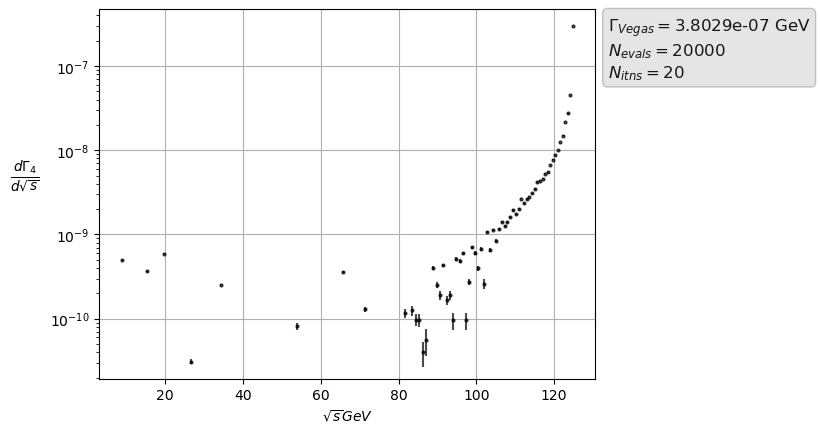

In [12]:
dI_4s = []
dI_4errs = []
sqs = []
ss = []
for i in range(0, bins):
    ss += [s_min_fix + 0.5 * (s_max_fix - s_min_fix) / bins + i * (s_max_fix - s_min_fix) / bins]
    
sbins = []
for i in range(0, bins + 1):
    sbins += [i * (s_max_fix - s_min_fix) / bins]
    
sdbins = []
for i in range(0, bins):
    sdbins += [sbins[i + 1] ** 0.5 - sbins[i] ** 0.5]
    
for i in range(0, bins):
    dI_4s += [total_rate['dI_4'][i].mean / sdbins[i]]
    dI_4errs += [total_rate['dI_4'][i].sdev / sdbins[i]]

sqs = np.array(ss) ** 0.5

fig, ax = plt.subplots()

ax.errorbar(sqs, np.array(dI_4s), color = 'black', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'Vegas', yerr = np.array(dI_4errs))

plt.grid()
textstr = '\n'.join((
    r'$\Gamma_{Vegas}=$' +str(round(computed_4, 11))+ ' GeV',
    r'$N_{evals}=$' +str(nevals)+ '',
    r'$N_{itns}=$' +str(nitns)+ ''))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

plt.yscale('log')

plt.ylabel(r'$\frac{d\Gamma_{4}}{d\sqrt{s}}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xlabel(r'$\sqrt{s} GeV$')
#plt.ylim(10**-10, 10**-6)
#plt.xlim(0, 130)
plt.show()

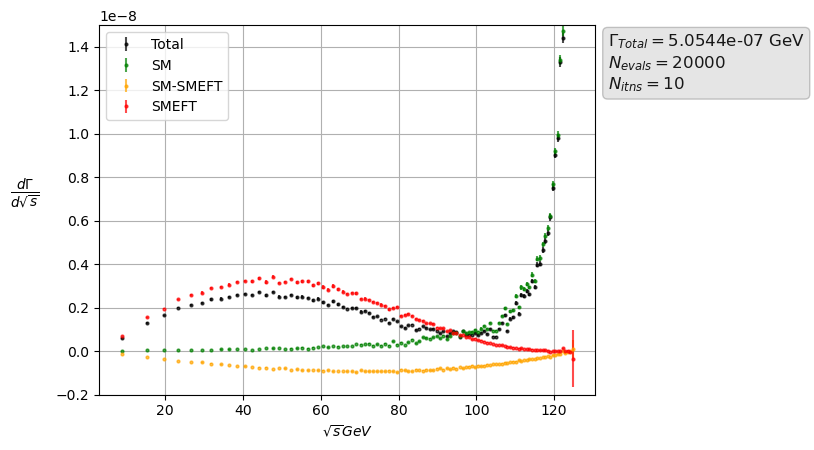

In [30]:
fig, ax = plt.subplots()

ax.errorbar(sqs, np.array(dIs), color = 'black', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'Total', yerr = np.array(dI_errs))
ax.errorbar(sqs, np.array(dI_4s), color = 'green', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'SM', yerr = np.array(dI_4errs))
ax.errorbar(sqs, np.array(dI_6s), color = 'orange', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'SM-SMEFT', yerr = np.array(dI_6errs))
ax.errorbar(sqs, np.array(dI_8s), color = 'red', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'SMEFT', yerr = np.array(dI_8errs))

plt.grid()
textstr = '\n'.join((
    r'$\Gamma_{Total}=$' +str(round(computed, 11))+ ' GeV',
    r'$N_{evals}=$' +str(nevals)+ '',
    r'$N_{itns}=$' +str(nitns)+ ''))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

#plt.yscale('log')

plt.ylabel(r'$\frac{d\Gamma}{d\sqrt{s}}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xlabel(r'$\sqrt{s} GeV$')
plt.ylim(-2 * 10**-9, 1.5*10**-8)
plt.legend()
#plt.xlim(0, 130)
plt.show()

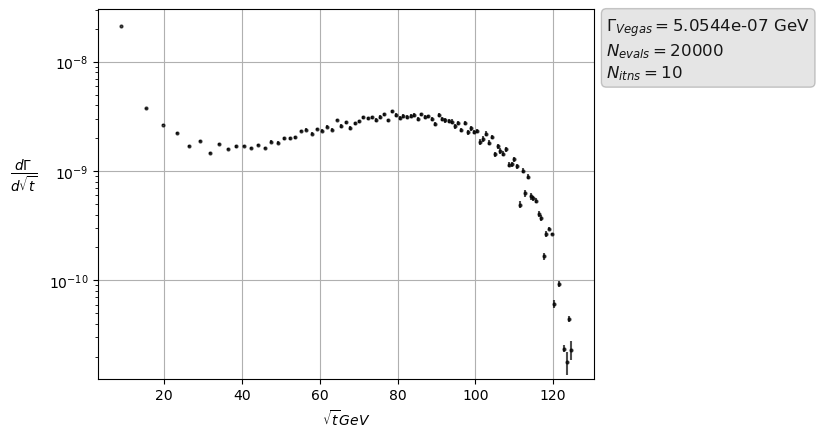

In [38]:
dI_ts = []
dI_terrs = []
sqt = []
ts = []
for i in range(0, bins):
    ts += [t_min_fix + 0.5 * (t_max_fix - t_min_fix) / bins + i * (t_max_fix - t_min_fix) / bins]
    
tbins = []
for i in range(0, bins + 1):
    tbins += [i * (t_max_fix - t_min_fix) / bins]
    
tdbins = []
for i in range(0, bins):
    tdbins += [tbins[i + 1] ** 0.5 - tbins[i] ** 0.5]
    
for i in range(0, bins):
    dI_ts += [total_rate['dI_t'][i].mean / tdbins[i]]
    dI_terrs += [total_rate['dI_t'][i].sdev / tdbins[i]]

sqt = np.array(ts) ** 0.5

fig, ax = plt.subplots()

ax.errorbar(sqt, np.array(dI_ts), color = 'black', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'Vegas', yerr = np.array(dI_terrs))

plt.grid()
textstr = '\n'.join((
    r'$\Gamma_{Vegas}=$' +str(round(computed, 11))+ ' GeV',
    r'$N_{evals}=$' +str(nevals)+ '',
    r'$N_{itns}=$' +str(nitns)+ ''))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

plt.yscale('log')
plt.ylabel(r'$\frac{d\Gamma}{d\sqrt{t}}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xlabel(r'$\sqrt{t} GeV$')
#plt.ylim(10**-11, 10**-6)
#plt.xlim(0, 130)
plt.show()

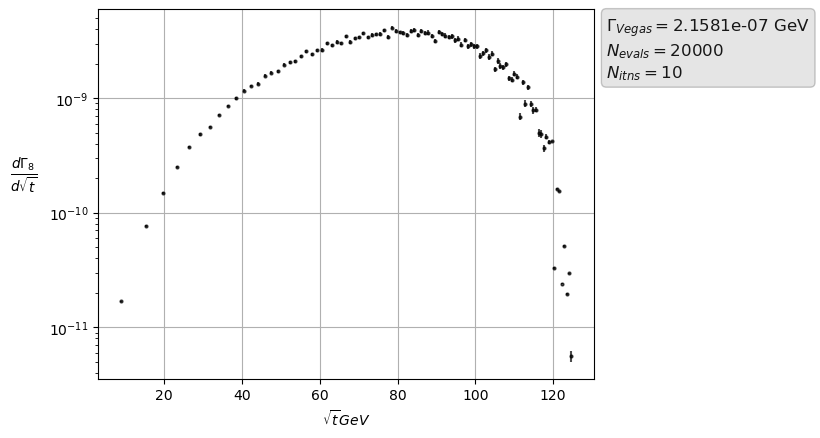

In [39]:
dI_8ts = []
dI_8terrs = []
sqt = []
ts = []
for i in range(0, bins):
    ts += [t_min_fix + 0.5 * (t_max_fix - t_min_fix) / bins + i * (t_max_fix - t_min_fix) / bins]
    
tbins = []
for i in range(0, bins + 1):
    tbins += [i * (t_max_fix - t_min_fix) / bins]
    
tdbins = []
for i in range(0, bins):
    tdbins += [tbins[i + 1] ** 0.5 - tbins[i] ** 0.5]
    
for i in range(0, bins):
    dI_8ts += [total_rate['dI_8_t'][i].mean / tdbins[i]]
    dI_8terrs += [total_rate['dI_8_t'][i].sdev / tdbins[i]]

sqt = np.array(ts) ** 0.5

fig, ax = plt.subplots()

ax.errorbar(sqt, np.array(dI_8ts), color = 'black', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'Vegas', yerr = np.array(dI_8terrs))

plt.grid()
textstr = '\n'.join((
    r'$\Gamma_{Vegas}=$' +str(round(computed_8, 11))+ ' GeV',
    r'$N_{evals}=$' +str(nevals)+ '',
    r'$N_{itns}=$' +str(nitns)+ ''))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

plt.yscale('log')
plt.ylabel(r'$\frac{d\Gamma_{8}}{d\sqrt{t}}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xlabel(r'$\sqrt{t} GeV$')
#plt.ylim(10**-11, 10**-6)
#plt.xlim(0, 130)
plt.show()

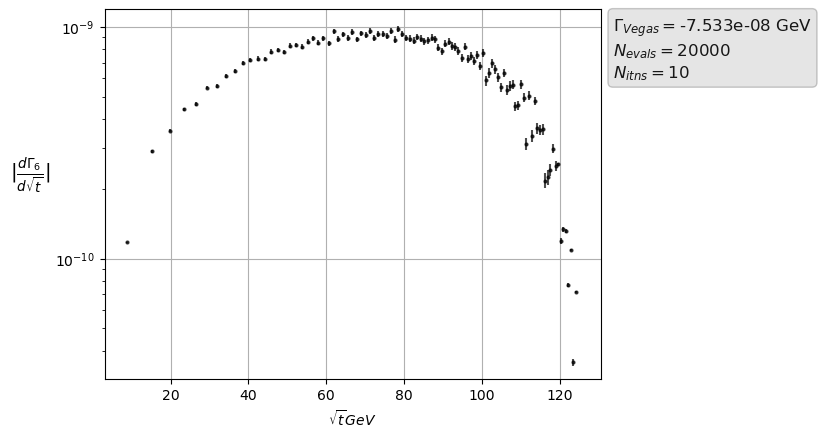

In [41]:
dI_6ts = []
dI_6terrs = []
sqt = []
ts = []
for i in range(0, bins):
    ts += [t_min_fix + 0.5 * (t_max_fix - t_min_fix) / bins + i * (t_max_fix - t_min_fix) / bins]
    
tbins = []
for i in range(0, bins + 1):
    tbins += [i * (t_max_fix - t_min_fix) / bins]
    
tdbins = []
for i in range(0, bins):
    tdbins += [tbins[i + 1] ** 0.5 - tbins[i] ** 0.5]
    
for i in range(0, bins):
    dI_6ts += [total_rate['dI_6_t'][i].mean / tdbins[i]]
    dI_6terrs += [total_rate['dI_6_t'][i].sdev / tdbins[i]]

sqt = np.array(ts) ** 0.5

fig, ax = plt.subplots()

ax.errorbar(sqt, -np.array(dI_6ts), color = 'black', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'Vegas', yerr = np.array(dI_6terrs))

plt.grid()
textstr = '\n'.join((
    r'$\Gamma_{Vegas}=$' +str(round(computed_6, 11))+ ' GeV',
    r'$N_{evals}=$' +str(nevals)+ '',
    r'$N_{itns}=$' +str(nitns)+ ''))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

plt.yscale('log')
plt.ylabel(r'$|\frac{d\Gamma_{6}}{d\sqrt{t}}|$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xlabel(r'$\sqrt{t} GeV$')
#plt.ylim(10**-11, 10**-6)
#plt.xlim(0, 130)
plt.show()

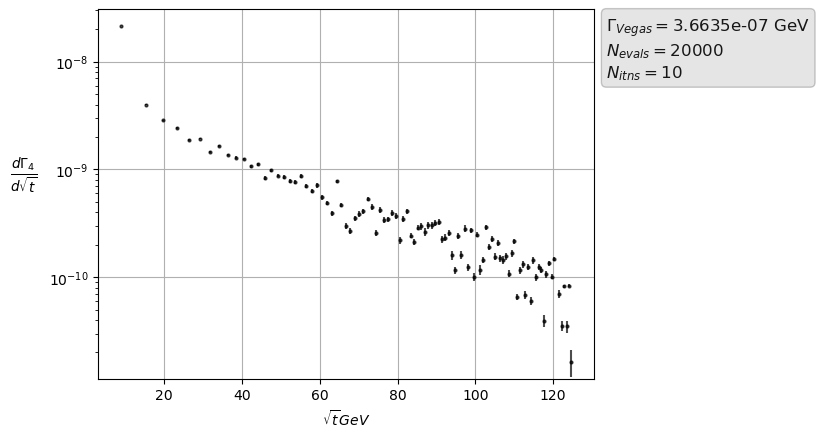

In [42]:
dI_4ts = []
dI_4terrs = []
sqt = []
ts = []
for i in range(0, bins):
    ts += [t_min_fix + 0.5 * (t_max_fix - t_min_fix) / bins + i * (t_max_fix - t_min_fix) / bins]
    
tbins = []
for i in range(0, bins + 1):
    tbins += [i * (t_max_fix - t_min_fix) / bins]
    
tdbins = []
for i in range(0, bins):
    tdbins += [tbins[i + 1] ** 0.5 - tbins[i] ** 0.5]
    
for i in range(0, bins):
    dI_4ts += [total_rate['dI_4_t'][i].mean / tdbins[i]]
    dI_4terrs += [total_rate['dI_4_t'][i].sdev / tdbins[i]]

sqt = np.array(ts) ** 0.5

fig, ax = plt.subplots()

ax.errorbar(sqt, np.array(dI_4ts), color = 'black', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'Vegas', yerr = np.array(dI_4terrs))

plt.grid()
textstr = '\n'.join((
    r'$\Gamma_{Vegas}=$' +str(round(computed_4, 11))+ ' GeV',
    r'$N_{evals}=$' +str(nevals)+ '',
    r'$N_{itns}=$' +str(nitns)+ ''))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

plt.yscale('log')
plt.ylabel(r'$\frac{d\Gamma_{4}}{d\sqrt{t}}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xlabel(r'$\sqrt{t} GeV$')
#plt.ylim(10**-11, 10**-6)
#plt.xlim(0, 130)
plt.show()

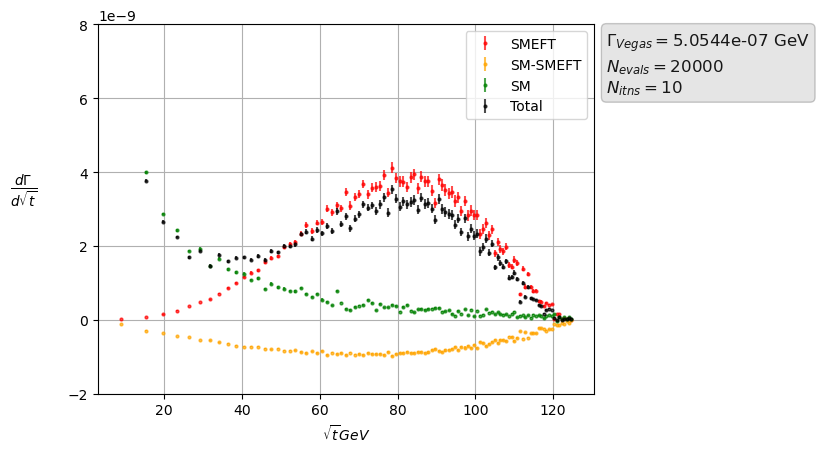

In [44]:
fig, ax = plt.subplots()

ax.errorbar(sqt, np.array(dI_8ts), color = 'red', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'SMEFT', yerr = np.array(dI_8terrs))
ax.errorbar(sqt, np.array(dI_6ts), color = 'orange', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'SM-SMEFT', yerr = np.array(dI_6terrs))
ax.errorbar(sqt, np.array(dI_4ts), color = 'green', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'SM', yerr = np.array(dI_4terrs))
ax.errorbar(sqt, np.array(dI_ts), color = 'black', alpha = 0.7, 
            ls = 'None', markersize = 4, marker = '.', label = 'Total', yerr = np.array(dI_terrs))

plt.grid()
textstr = '\n'.join((
    r'$\Gamma_{Vegas}=$' +str(round(computed, 11))+ ' GeV',
    r'$N_{evals}=$' +str(nevals)+ '',
    r'$N_{itns}=$' +str(nitns)+ ''))

props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
ax.text(1.025, 0.98, textstr, transform=ax.transAxes, fontsize=12, alpha = 0.9,
        verticalalignment='top', bbox=props)

#plt.yscale('log')
plt.ylabel(r'$\frac{d\Gamma}{d\sqrt{t}}$', rotation = '0', fontsize = 14)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.xlabel(r'$\sqrt{t} GeV$')
plt.ylim(-2*10**-9, 8 * 10**-9)
#plt.xlim(0, 130)
plt.legend()
plt.show()